In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
ca=pd.read_csv("2016-2022.csv")

In [8]:
ca.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
1,8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
2,8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
3,8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
4,8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND


In [9]:
ca.shape

(107690, 31)

In [10]:
ca.info

<bound method DataFrame.info of         data_id  iso event_id_cnty  event_id_no_cnty       event_date  year  \
0       8912977  356     IND107923          107923.0    18 March 2022  2022   
1       8912990  356     IND107846          107846.0    18 March 2022  2022   
2       8913012  356     IND107941          107941.0    18 March 2022  2022   
3       8913089  356     IND107842          107842.0    18 March 2022  2022   
4       8913091  356     IND107850          107850.0    18 March 2022  2022   
...         ...  ...           ...               ...              ...   ...   
107685  5494159  356          IND9               9.0  01 January 2016  2016   
107686  5603486  356      IND51303           51303.0  01 January 2016  2016   
107687  6072644  356      IND49232           49232.0  01 January 2016  2016   
107688  6257234  356         IND10              10.0  01 January 2016  2016   
107689  8543376  356      IND49233           49233.0  01 January 2016  2016   

        time_precis

In [11]:
ca.isnull().sum()

data_id                 0
iso                     0
event_id_cnty           0
event_id_no_cnty        0
event_date              0
year                    0
time_precision          0
event_type              0
sub_event_type          0
actor1                  0
assoc_actor_1       30773
inter1                  0
actor2              76315
assoc_actor_2       96179
inter2                  0
interaction             0
region                  0
country                 0
admin1                  0
admin2                 18
admin3               2239
location                0
latitude                0
longitude               0
geo_precision           0
source                  0
source_scale            0
notes                   0
fatalities              0
timestamp               0
iso3                    0
dtype: int64

In [12]:
ca.dtypes

data_id               int64
iso                   int64
event_id_cnty        object
event_id_no_cnty    float64
event_date           object
year                  int64
time_precision        int64
event_type           object
sub_event_type       object
actor1               object
assoc_actor_1        object
inter1                int64
actor2               object
assoc_actor_2        object
inter2                int64
interaction           int64
region               object
country              object
admin1               object
admin2               object
admin3               object
location             object
latitude            float64
longitude           float64
geo_precision         int64
source               object
source_scale         object
notes                object
fatalities            int64
timestamp             int64
iso3                 object
dtype: object

RENAMING THE COLUMNS

In [13]:
# df.rename(columns={
#     'old_column_name': 'new_column_name',
#     'another_old': 'another_new'
# }, inplace=True)
ca.rename(columns={'admin1':'State',
                   'admin2':'District',
                   'admin3':'local_area'},inplace=True)


In [14]:
ca.rename(columns={
    'event_date':'Date',
    'iso':'Country_code',
    'actor1':'Main_actor',
    'assoc_actor_1':'associated_actor_1',
    'source':'Report_source',
    'source_scale':'Source_coverage',
    'notes':'event_description',
    'iso3':'country_code_alpha',
    'event_id_no_cnty':'event_id_local'
    
},inplace=True)

In [15]:
ca.head(5)

,data_id,Country_code,event_id_cnty,event_id_local,Date,year,time_precision,event_type,sub_event_type,Main_actor,associated_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,State,District,local_area,location,latitude,longitude,geo_precision,Report_source,Source_coverage,event_description,fatalities,timestamp,country_code_alpha
0,8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
1,8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
2,8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
3,8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
4,8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND


PREPROCESSING OF DATA

In [16]:
ca.isnull().sum()

data_id                   0
Country_code              0
event_id_cnty             0
event_id_local            0
Date                      0
year                      0
time_precision            0
event_type                0
sub_event_type            0
Main_actor                0
associated_actor_1    30773
inter1                    0
actor2                76315
assoc_actor_2         96179
inter2                    0
interaction               0
region                    0
country                   0
State                     0
District                 18
local_area             2239
location                  0
latitude                  0
longitude                 0
geo_precision             0
Report_source             0
Source_coverage           0
event_description         0
fatalities                0
timestamp                 0
country_code_alpha        0
dtype: int64

In [17]:
ca['District'].fillna('UNKNOWN', inplace=True) 
ca['local_area'].fillna('UNKNOWN', inplace=True) 
#District column was having 18 null values 
#local_area column was having 2239 null values 
# that`s why UNKNOWN  value has been filled


C:\Users\sharm\AppData\Local\Temp\ipykernel_7976\2516492866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ca['District'].fillna('UNKNOWN', inplace=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_7976\2516492866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [18]:
ca.duplicated().sum()
# there are no duplicates in the entire data set


np.int64(0)

In [19]:
ca['Report_source'].isnull().sum()



np.int64(0)

In [20]:
ca['Source_coverage'].isnull().sum()

np.int64(0)

In [21]:
ca.columns

Index(['data_id', 'Country_code', 'event_id_cnty', 'event_id_local', 'Date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'Main_actor',
       'associated_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'State', 'District', 'local_area',
       'location', 'latitude', 'longitude', 'geo_precision', 'Report_source',
       'Source_coverage', 'event_description', 'fatalities', 'timestamp',
       'country_code_alpha'],
      dtype='object')

In [22]:
ca.head()

,data_id,Country_code,event_id_cnty,event_id_local,Date,year,time_precision,event_type,sub_event_type,Main_actor,associated_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,State,District,local_area,location,latitude,longitude,geo_precision,Report_source,Source_coverage,event_description,fatalities,timestamp,country_code_alpha
0,8912977,356,IND107923,107923.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Singraur Caste Group (India); Rajput Caste Gro...,5,Rioters (India),Sonkar Caste Group (India); Dalit Caste Group ...,5,55,South Asia,India,Uttar Pradesh,Fatehpur,Khaga,Kishanpur,25.6422,81.0244,1,Amar Ujala,Subnational,"On 18 March 2022, members of two caste groups ...",0,1647961433,IND
1,8912990,356,IND107846,107846.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Labour Group (India),6,NaN,NaN,0,60,South Asia,India,Maharashtra,Mumbai City,Mumbai City,Mumbai - Azad Maidan,18.9388,72.8321,1,Asian News International,National,"On 18 March 2022, aircraft technicians, employ...",0,1647961433,IND
2,8913012,356,IND107941,107941.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),NaN,6,NaN,NaN,0,60,South Asia,India,Punjab,Sangrur,Malerkotla,Ahmedgarh,30.6785,75.8272,1,Chandigarh Tribune,National,"On 18 March 2022, activists of various organis...",0,1647961433,IND
3,8913089,356,IND107842,107842.0,18 March 2022,2022,1,Protests,Peaceful protest,Protesters (India),Health Workers (India),6,NaN,NaN,0,60,South Asia,India,Madhya Pradesh,Indore,Indore,Indore,22.7179,75.8333,1,Free Press Journal (India),National,"On 18 March 2022, doctors staged a protest at ...",0,1647961433,IND
4,8913091,356,IND107850,107850.0,18 March 2022,2022,1,Riots,Mob violence,Rioters (India),Government of India (2014-),5,Civilians (India),Former Government of India (2014-),7,57,South Asia,India,Madhya Pradesh,Bhind,Bhind,Kanavar,26.5622,78.9797,1,Free Press Journal (India),National,"On 18 March 2022, around half a dozen persons,...",1,1647961433,IND


Using the pie chart to detect the values in the actor_2 column so that conditional filling can be done

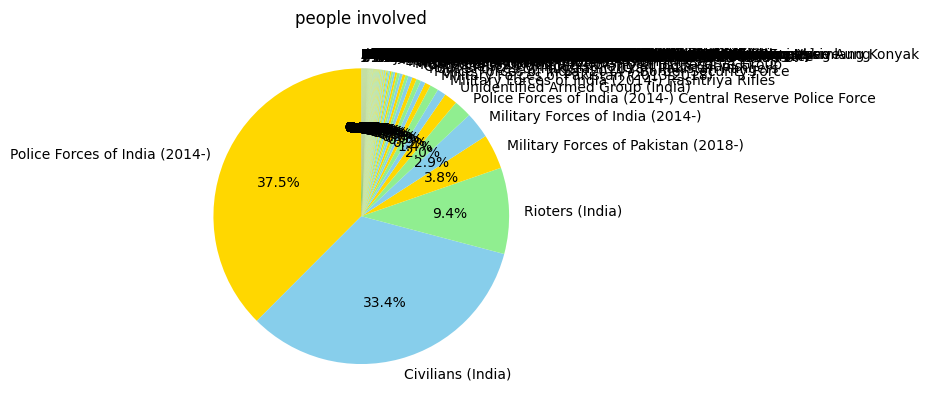

In [23]:
category_counts = ca['actor2'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue', 'lightgreen'])
plt.title('people involved')
plt.show()

In [24]:
print(ca['actor2'].unique())  # all distinct values

['Rioters (India)' nan 'Civilians (India)'
 'Police Forces of India (2014-)'
 'TSPC: Tritiya Sammelan Prastuti Committee' 'LeT: Lashkar-e-Taiba'
 'CPI (Maoist): Communist Party of India (Maoist)'
 'Police Forces of India (2014-) Indo-Tibetan Border Police Force'
 'Police Forces of India (2014-) Chhattisgarh Armed Forces'
 'Police Forces of India (2014-) District Reserve Group'
 'JeM: Jaish-e-Mohammad' 'Unidentified Armed Group (India)'
 'Naxal-Maoist Rebels (India)' 'Private Security Forces (India)'
 'Government of India (2014-)' 'Civilians (Pakistan)'
 'NSCN-K-YA: National Socialist Council of Nagaland-Khaplang-Yung Aung'
 "PLA: People's Liberation Army of Manipur"
 'NSCN-IM: National Socialist Council of Nagaland-Isak Muivah'
 'Unidentified Armed Group (Pakistan)' 'Protesters (India)'
 'Unidentified Armed Group (Myanmar)'
 'Police Forces of India (2014-) Central Reserve Police Force'
 'JJMP: Jharkhand Jan Mukti Parishad'
 "PLFI: People's Liberation Front of India"
 'Police Forces of 

In [25]:
most_common = ca['actor2'].mode()[0]
print(f"The most frequent value is: {most_common}")

The most frequent value is: Police Forces of India (2014-)


In [26]:
ca.loc[(ca['actor2'].isna()) & (ca['event_type'] == 'Protests'), 'actor2'] = 'Civilians (India)'



In [27]:
ca.isnull().sum()

data_id                   0
Country_code              0
event_id_cnty             0
event_id_local            0
Date                      0
year                      0
time_precision            0
event_type                0
sub_event_type            0
Main_actor                0
associated_actor_1    30773
inter1                    0
actor2                 1950
assoc_actor_2         96179
inter2                    0
interaction               0
region                    0
country                   0
State                     0
District                  0
local_area                0
location                  0
latitude                  0
longitude                 0
geo_precision             0
Report_source             0
Source_coverage           0
event_description         0
fatalities                0
timestamp                 0
country_code_alpha        0
dtype: int64

In [28]:
ca.loc[(ca['assoc_actor_2'].isna()) & (ca['actor2'].notna()), 'assoc_actor_2'] = 'Related to ' + ca['actor2']


In [29]:
ca.isnull().sum()

data_id                   0
Country_code              0
event_id_cnty             0
event_id_local            0
Date                      0
year                      0
time_precision            0
event_type                0
sub_event_type            0
Main_actor                0
associated_actor_1    30773
inter1                    0
actor2                 1950
assoc_actor_2          1950
inter2                    0
interaction               0
region                    0
country                   0
State                     0
District                  0
local_area                0
location                  0
latitude                  0
longitude                 0
geo_precision             0
Report_source             0
Source_coverage           0
event_description         0
fatalities                0
timestamp                 0
country_code_alpha        0
dtype: int64

In [30]:
dv = ca.dropna()


In [31]:
dv.isnull().sum()

data_id               0
Country_code          0
event_id_cnty         0
event_id_local        0
Date                  0
year                  0
time_precision        0
event_type            0
sub_event_type        0
Main_actor            0
associated_actor_1    0
inter1                0
actor2                0
assoc_actor_2         0
inter2                0
interaction           0
region                0
country               0
State                 0
District              0
local_area            0
location              0
latitude              0
longitude             0
geo_precision         0
Report_source         0
Source_coverage       0
event_description     0
fatalities            0
timestamp             0
country_code_alpha    0
dtype: int64